# Graduate Admissin Prediction

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [187]:
import warnings

In [188]:
warnings.filterwarnings("ignore")

In [189]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.regularizers import l2

In [190]:
df = pd.read_csv(r"S:\Downloads\archive\Admission_Predict_Ver1.1.csv")

In [191]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [192]:
df.shape

(500, 9)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [194]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [195]:
df.duplicated().sum()

np.int64(0)

In [196]:
df.drop(columns=['Serial No.'],inplace=True)

In [197]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [198]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [199]:
X = df.drop(columns=['Chance of Admit '])
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [200]:
y = df['Chance of Admit '].values

In [201]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [202]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [203]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(100,)
(100,)


In [204]:
scaler = StandardScaler()

In [205]:
X_train_scaled = scaler.fit_transform(X_train)

In [206]:
X_train_scaled

array([[-0.04016943, -0.67929422, -0.96690042, ...,  1.11412136,
         0.28102503, -1.12815215],
       [-0.86181695, -0.34712101, -0.96690042, ...,  1.11412136,
        -0.7577916 ,  0.88640526],
       [ 0.69018391,  0.81548524,  0.7752625 , ..., -1.08389858,
        -0.79130182,  0.88640526],
       ...,
       [-1.50087613, -2.00798708, -0.96690042, ..., -2.18290856,
        -0.59024053,  0.88640526],
       [-0.22275777, -0.34712101, -0.09581896, ..., -1.08389858,
        -0.45619968, -1.12815215],
       [-2.13993531, -1.67581387, -0.96690042, ...,  0.56461637,
        -1.29395503,  0.88640526]], shape=(400, 7))

In [207]:
X_test_scaled = scaler.transform(X_test)

In [208]:
X_test_scaled

array([[ 1.51183143,  1.81200488,  1.64634396,  1.67049933,  1.66362634,
         1.30308656,  0.88640526],
       [-0.49664028, -0.84538083, -0.09581896,  1.1592524 ,  0.56461637,
         0.11347396,  0.88640526],
       [-1.04440529, -0.51320762, -0.96690042, -0.8857353 , -2.18290856,
        -1.31071013, -1.12815215],
       [ 2.15089061,  0.98157185,  0.7752625 ,  1.67049933,  1.66362634,
         1.95653573,  0.88640526],
       [-1.8660528 , -1.34364065, -0.96690042, -0.8857353 , -1.08389858,
        -0.90858757, -1.12815215],
       [-0.1314636 , -0.51320762, -0.09581896,  0.64800548, -1.08389858,
        -0.79130182, -1.12815215],
       [ 0.69018391, -0.01494779,  0.7752625 ,  0.64800548,  1.11412136,
         0.49884142,  0.88640526],
       [-0.67922861, -0.34712101, -0.96690042, -0.8857353 ,  0.56461637,
        -1.49501631, -1.12815215],
       [-1.13569946, -1.67581387, -0.96690042, -1.90822915, -1.63340357,
        -1.56203674, -1.12815215],
       [-1.04440529, -0.3471

In [209]:
print(X_train_scaled.shape)

(400, 7)


In [210]:
model = Sequential()

In [211]:
model.add(Dense(7,input_dim=7,activation='relu'))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1,activation="linear"))

In [212]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477 (5.77 KB)

 Trainable params: 1,477 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

In [213]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['r2_score'])

In [214]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.9546 - r2_score: -20.5893 - val_loss: 0.8305 - val_r2_score: -19.9882
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7608 - r2_score: -12.2890 - val_loss: 0.6566 - val_r2_score: -10.4032
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5996 - r2_score: -5.4842 - val_loss: 0.5349 - val_r2_score: -4.0687
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5031 - r2_score: -1.8692 - val_loss: 0.4930 - val_r2_score: -2.9250
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4646 - r2_score: -1.1953 - val_loss: 0.4509 - val_r2_score: -1.8681
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4302 - r2_score: -0.7459 - val_loss: 0.4202 - val_r2_score: -1.4551
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4013 - r2_score: -0.4504 - val_loss: 0.3912 - val_r2_score: -0.9836
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3755 - r2_score: -0.2160 - val_loss: 

In [215]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [216]:
r2_score(y_pred,y_test)

0.6564663687642232

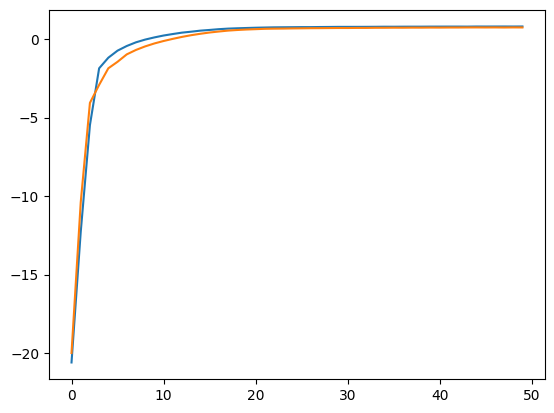

In [217]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])

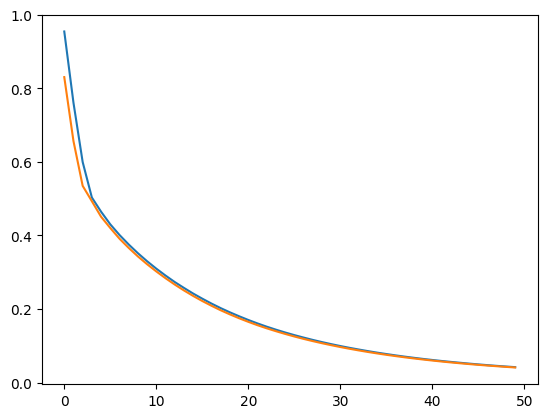

In [218]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])